In [29]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [30]:
#create the dataframe first

df = pd.DataFrame(columns=['news_article', 'label'])

#creating a function for the job
def find_txt_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files: #iterates over each element in the current directory
            
            #check for '.txt' files
            if file.lower().endswith('.txt'):
            
                file_path = os.path.abspath(os.path.join(root, file))
                dirname = file_path.split(os.path.sep)[-2]
            
                #open and read the file
                with open(file_path, 'r') as f:
                    text = f.read()
                    text = text.replace('\n', ' ')
                    df.loc[len(df)] = [text, dirname]

In [31]:
directory_path = 'BBC'

find_txt_files(directory_path)
print(df.shape)
df.head(30)

(2214, 2)


,news_article,label
0,Consists of 2225 documents from the BBC news w...,BBC
1,Solskjaer raises hopes of return Manchester U...,sport
2,"What now for Kelly Holmes? Last April, Kelly ...",sport
3,O'Connor aims to grab opportunity Johnny O'Co...,sport
4,Gebrselassie in London triple bid Double Olym...,sport
5,London Irish 19-33 Wasps Wasps made light of ...,sport
6,Injury sidelines Philippoussis Mark Philippou...,sport
7,Mansfield 0-1 Leyton Orient An second-half go...,sport
8,Holmes starts 2005 with GB events Kelly Holme...,sport
9,Taylor poised for Scotland return Simon Taylo...,sport


In [32]:
df = df.iloc[1: ]
df

,news_article,label
1,Solskjaer raises hopes of return Manchester U...,sport
2,"What now for Kelly Holmes? Last April, Kelly ...",sport
3,O'Connor aims to grab opportunity Johnny O'Co...,sport
4,Gebrselassie in London triple bid Double Olym...,sport
5,London Irish 19-33 Wasps Wasps made light of ...,sport
...,...,...
2209,Citizenship event for 18s touted Citizenship ...,politics
2210,Blair to face trust issue head on Tony Blair ...,politics
2211,Hewitt decries 'career sexism' Plans to exten...,politics
2212,Terror detainees win Lords appeal Detaining f...,politics


In [33]:
df.label.value_counts()

label
sport            508
business         507
politics         415
tech             397
entertainment    386
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

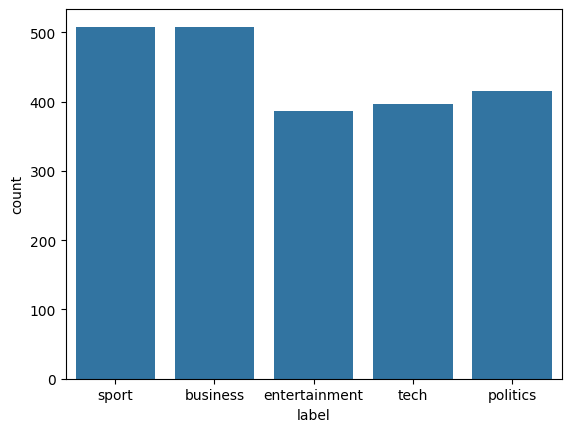

In [34]:
sns.countplot(data=df, x='label')

In [35]:
y = df['label']
X = df[['news_article']]

X

,news_article
1,Solskjaer raises hopes of return Manchester U...
2,"What now for Kelly Holmes? Last April, Kelly ..."
3,O'Connor aims to grab opportunity Johnny O'Co...
4,Gebrselassie in London triple bid Double Olym...
5,London Irish 19-33 Wasps Wasps made light of ...
...,...
2209,Citizenship event for 18s touted Citizenship ...
2210,Blair to face trust issue head on Tony Blair ...
2211,Hewitt decries 'career sexism' Plans to exten...
2212,Terror detainees win Lords appeal Detaining f...


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [37]:
X_train.shape

(1770, 1)

Visualization for the X values

[nltk_data] Downloading package stopwords to /home/raph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


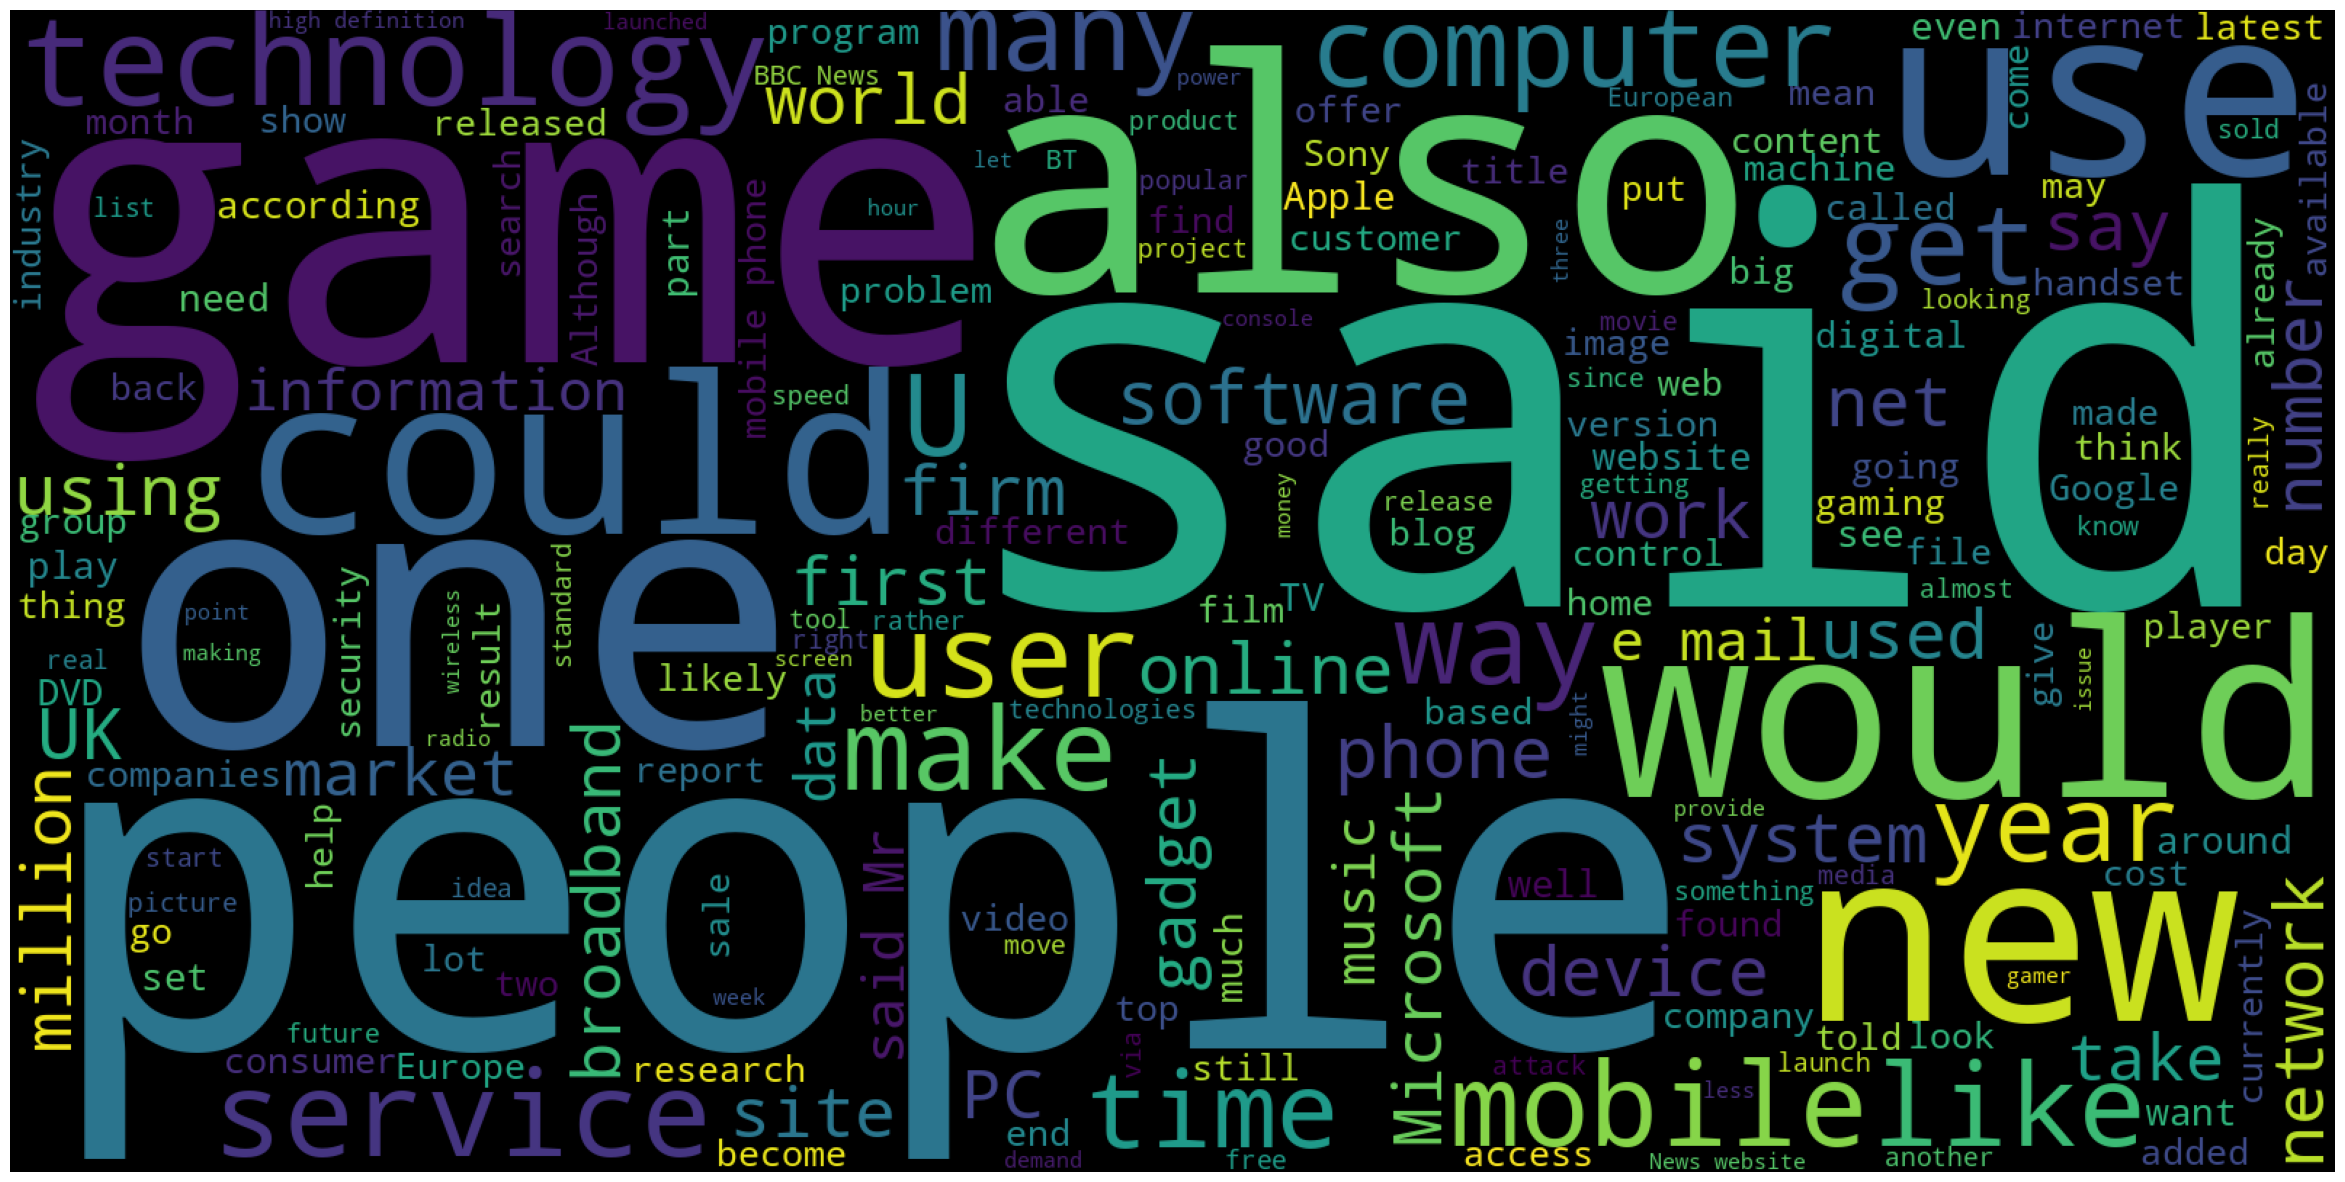

In [38]:
import nltk
nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.corpus import stopwords

text = " ".join(X_train.loc[y_train=='tech', 'news_article'])

word_cloud = WordCloud(stopwords=stopwords.words('english'),background_color='black',width=1600,height=800).generate(text)

plt.figure(1, figsize=(30,20))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [39]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [40]:
#initialize the inbuilt stemmer
stemmer = PorterStemmer()

##using the lemmatizer
lemmatizer = WordNetLemmatizer()

In [41]:
def preprocess(raw_text, flag):
    #removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    #change sentence to lower case
    sentence = sentence.lower()
    
    #tokenize into words
    tokens = sentence.split()
    
    #removing stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words('english')]
    
    #stemming/lemmatization
    if (flag=='stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
        
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [42]:
nltk.download('wordnet')
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

[nltk_data] Downloading package wordnet to /home/raph/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
temp_df = X_train['news_article'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|██████████| 1770/1770 [01:23<00:00, 21.28it/s]


,0,1
1979,glance tory health check uk opposition conserv...,294
799,indonesian face fuel price rise indonesia gove...,182
1494,confusion high definition tv critical mass peo...,450
1365,triple triumph little britain top tv cult hit ...,360
904,steel firm cut job mittal steel one world larg...,161


In [44]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']
X_train = pd.concat([X_train, temp_df], axis =1)
X_train.head()

,news_article,clean_text_lemma,text_length_lemma
1979,At a glance: Tory health checks The UK' oppos...,glance tory health check uk opposition conserv...,294
799,Indonesians face fuel price rise Indonesia's ...,indonesian face fuel price rise indonesia gove...,182
1494,Confusion over high-definition TV Now that a ...,confusion high definition tv critical mass peo...,450
1365,Triple triumph for Little Britain Top TV cult...,triple triumph little britain top tv cult hit ...,360
904,"Steel firm 'to cut' 45,000 jobs Mittal Steel,...",steel firm cut job mittal steel one world larg...,161


In [45]:
print(X_train.columns)

Index(['news_article', 'clean_text_lemma', 'text_length_lemma'], dtype='object')


Converting text to numerical vectors

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer()
X_train_bow = vocab.fit_transform(X_train['clean_text_lemma'])
X_train_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 260712 stored elements and shape (1770, 22563)>

In [47]:
print('Total unique words:', len(vocab.vocabulary_))
print('Type of train features:', type(X_train_bow))
print('Shape of input data:', X_train_bow.shape)

Total unique words: 22563
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (1770, 22563)


Preprocessing Test Data

In [48]:
temp_df = X_test['news_article'].progress_apply(lambda x: preprocess(x, 'lemma'))
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

X_test = pd.concat([X_test, temp_df], axis=1)
X_test.head()

100%|██████████| 443/443 [00:20<00:00, 21.51it/s]


,news_article,clean_text_lemma,text_length_lemma
856,'Post-Christmas lull' in lending UK mortgage ...,post christmas lull lending uk mortgage lendin...,115
1304,Musicians to tackle US red tape Musicians' gr...,musician tackle u red tape musician group tack...,209
1476,Intel unveils laser breakthrough Intel has un...,intel unveils laser breakthrough intel unveile...,278
431,Safin relieved at Aussie recovery Marat Safin...,safin relieved aussie recovery marat safin adm...,141
1269,Ocean's Twelve raids box office Ocean's Twelv...,ocean twelve raid box office ocean twelve crim...,168


In [49]:
X_test_bow = vocab.transform(X_test['clean_text_lemma'])

Naive Bayes

In [50]:
%%time

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

classifier = MultinomialNB()
classifier.fit(X_train_bow, y_train)

y_test_pred = classifier.predict(X_test_bow)

CPU times: user 56.4 ms, sys: 3.17 ms, total: 59.6 ms
Wall time: 58.7 ms


In [53]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9729119638826185
               precision    recall  f1-score   support

     business       0.99      0.95      0.97        95
entertainment       1.00      0.95      0.97        80
     politics       0.92      0.99      0.95        77
        sport       1.00      0.98      0.99       113
         tech       0.95      1.00      0.97        78

     accuracy                           0.97       443
    macro avg       0.97      0.97      0.97       443
 weighted avg       0.97      0.97      0.97       443



In [54]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[ 90,   0,   3,   0,   2],
       [  0,  76,   2,   0,   2],
       [  1,   0,  76,   0,   0],
       [  0,   0,   2, 111,   0],
       [  0,   0,   0,   0,  78]])

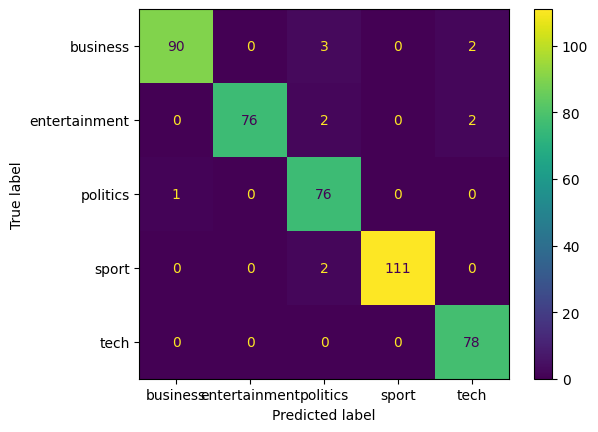

In [55]:
cm = metrics.confusion_matrix(y_test, y_test_pred, labels = classifier.classes_)
fig = metrics.ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
fig.plot()

Text(0.5, 23.52222222222222, 'Predicted')

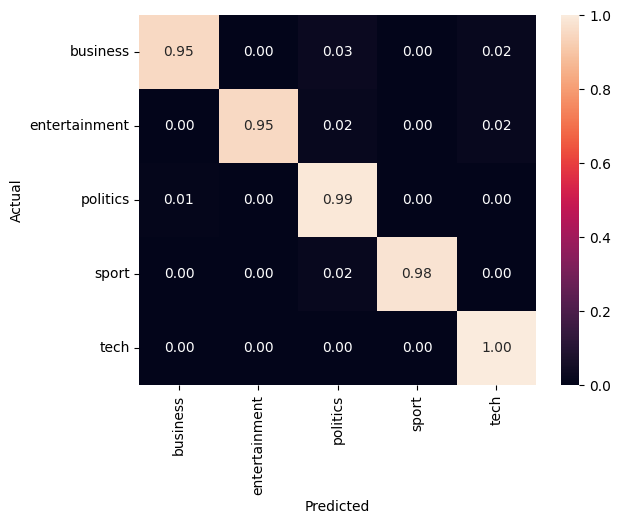

In [56]:
actual = np.sum(cm, axis=1).reshape(-1,1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')